In [4]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot_2samples
import pylab
import sklearn
import seaborn as sns



In [3]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

##  Task 1 Fixed effect and interaction effect models

In [7]:
#raw= pd.read_csv('D:/TOPIC_RELATED VOCABULARY IELTS/Finland/aalto/cemsschool/BP/dataset/Compare.csv')
initial= pd.read_csv('D:/TOPIC_RELATED VOCABULARY IELTS/Finland/aalto/cemsschool/BP/dataset/datataskfixedefuse.csv')



A valid observation would be a specific country in a specific year that has both values for claimed penetration rate (CP) and actual penetration rate (AP)

In [8]:
initial.describe() 

,Year,Claimed penetration,Actual penetration
count,70.000000,70.000000,70.000000
mean,2018.500000,50.906429,45.408143
std,1.113162,15.306521,18.768303
min,2017.000000,15.340000,4.080000
25%,2017.000000,41.835000,40.697500
50%,2019.000000,54.900000,48.210000
75%,2019.000000,62.047500,60.645000
max,2020.000000,71.840000,73.470000


In [9]:
Xfull = initial


In [10]:
Xfull

,Country,Year,Claimed penetration,Actual penetration
0,UK,2017,56.00,64.46
1,Germany,2017,69.15,62.05
2,Russia,2017,53.49,43.16
3,Brazil,2017,42.75,55.97
4,Thailand,2017,54.87,54.40
...,...,...,...,...
65,Spain,2020,65.29,40.62
66,Australia,2020,52.29,69.86
67,Mexico,2020,57.51,40.93
68,Belgium,2020,59.52,50.91


In [11]:
country= pd.get_dummies(Xfull.loc[:,'Country'],drop_first=True)

In [12]:
Xgen= pd.concat((Xfull,country),axis=1).drop(['Country'],axis=1)

In [13]:
Xgen

,Year,Claimed penetration,Actual penetration,Australia,Austria,Belgium,Brazil,Canada,Chile,China,...,Russia,Saudi-Arabia,South Africa***,Spain,Sweden,Switzerland,Thailand,UAE,UK,USA
0,2017,56.00,64.46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2017,69.15,62.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,53.49,43.16,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2017,42.75,55.97,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,54.87,54.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2020,65.29,40.62,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
66,2020,52.29,69.86,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,2020,57.51,40.93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,2020,59.52,50.91,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:

y=Xgen[' Actual penetration']

### Fixed effect model
The model incorporates 'year' considered to be continuous type  , and dummies variables for countries. These two are control variables. The explanatory variable is CP and the dependent variable is AP

In [15]:
X = Xgen.drop([' Actual penetration'],axis=1)

In [16]:
X2 = sm.add_constant(X)

In [19]:
X2

,const,Year,Claimed penetration,Australia,Austria,Belgium,Brazil,Canada,Chile,China,...,Russia,Saudi-Arabia,South Africa***,Spain,Sweden,Switzerland,Thailand,UAE,UK,USA
0,1.0,2017,56.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,2017,69.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2017,53.49,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,2017,42.75,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2017,54.87,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.0,2020,65.29,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
66,1.0,2020,52.29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,1.0,2020,57.51,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,1.0,2020,59.52,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
est = sm.OLS(y,X2)

In [21]:
est2= est.fit()

The result right below shows that the estimate coefficient for CP is -.0088 and is statistically insignificantly(P_value = .909 ) => Fail to reject H_1=> There is no relationship between CP and AP

In [22]:
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:      Actual penetration   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                     349.2
Date:                 Mon, 14 Jun 2021   Prob (F-statistic):           1.10e-36
Time:                         15:08:18   Log-Likelihood:                -102.06
No. Observations:                   70   AIC:                             272.1
Df Residuals:                       36   BIC:                             348.6
Df Model:                           33                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 60

In [52]:
p_value_r_squared= (np.sqrt(0.997)*np.sqrt(28))/np.sqrt(1-0.997) 

In [53]:
p_value_r_squared

96.46415569180776

=> R_squared is statistically significant

### Interaction effect
The model incorporates 'year' considered to be continuous type  , and dummies variables for countries. These two are control variables. The explanatory variable is CP. We also added CP multipled by year(cpy) as another explanatory variable. The dependent variable is AP

In [43]:
Xgen['cpy'] = Xgen['Year']*Xgen['Claimed penetration']

In [44]:
X = Xgen.drop([' Actual penetration'],axis=1)

In [45]:
X2= sm.add_constant(X)

In [47]:
X2

,const,Year,Claimed penetration,Australia,Austria,Belgium,Brazil,Canada,Chile,China,...,Saudi-Arabia,South Africa***,Spain,Sweden,Switzerland,Thailand,UAE,UK,USA,cpy
0,1.0,2017,56.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,112952.00
1,1.0,2017,69.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,139475.55
2,1.0,2017,53.49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,107889.33
3,1.0,2017,42.75,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,86226.75
4,1.0,2017,54.87,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,110672.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.0,2020,65.29,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,131885.80
66,1.0,2020,52.29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105625.80
67,1.0,2020,57.51,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,116170.20
68,1.0,2020,59.52,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,120230.40


In [48]:
est =sm.OLS(y,X2)

In [23]:
est2 =est.fit()

The result right below shows that the estimate coefficient for CP is 38.61 and is statistically insignificantly(P_value = .14 ) => Fail to reject H_1=> There is no relationship between CP and AP.

The estimate coefficient for cpy is -0.0191 and is statistically insignificantly(P_value = .139 ) => Fail to reject H_1=> There is no relationship between cpy and AP


In [51]:
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:      Actual penetration   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                     351.2
Date:                 Mon, 14 Jun 2021   Prob (F-statistic):           6.90e-36
Time:                         12:35:23   Log-Likelihood:                -99.843
No. Observations:                   70   AIC:                             269.7
Df Residuals:                       35   BIC:                             348.4
Df Model:                           34                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -141

## TASK 2 ONGOING GROWTH RATE 

In [33]:
initial= pd.read_csv('D:/TOPIC_RELATED VOCABULARY IELTS/Finland/aalto/cemsschool/BP/dataset/datataskogruse.csv')

In [34]:
Xgen = initial.dropna(how='any', axis=1)

In [ ]:
### Calculate changes over 

We computed the growth rate of CP(OGRC) and growth rate of AP (OGRA) in each country through  3 periods (2017 2018; 2018 2019; 2019 2020 ). There are 10 countries having full data to do so. It is 10 * 3 = 30 observations in total

In [35]:
Xgen 

,Country,OGRC,ORGA,Period
0,UK,6.50,0.28,1718
1,Germany,-5.86,-1.36,1718
2,Russia,2.12,5.26,1718
3,Brazil,7.44,1.86,1718
4,China,-12.95,0.45,1718
5,Poland,2.22,-2.32,1718
6,USA,-4.12,1.38,1718
7,Italy,6.39,-1.56,1718
8,Spain,5.36,-4.00,1718
9,Mexico,10.24,0.00,1718


In [36]:
gr= Xgen.groupby('Country')

In [37]:
gr.get_group('UK')

,Country,OGRC,ORGA,Period
0,UK,6.50,0.28,1718
10,UK,-7.89,-4.19,1819
20,UK,9.02,-0.90,1920



### Change over years (differentiate by country)

Just ignore the value in the period axis. It should represent (2017 2018; 2018 2019; 2019 2020 )

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


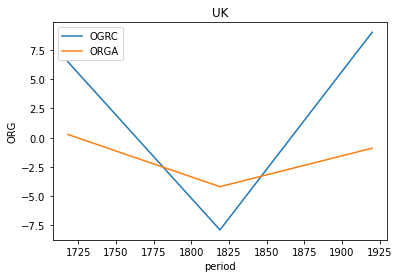

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


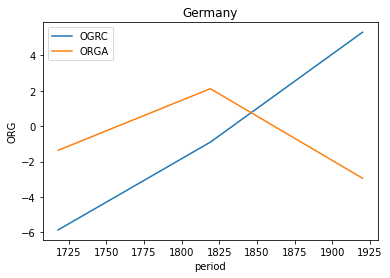

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


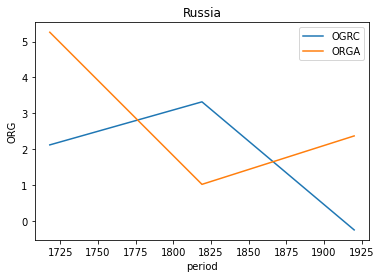

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


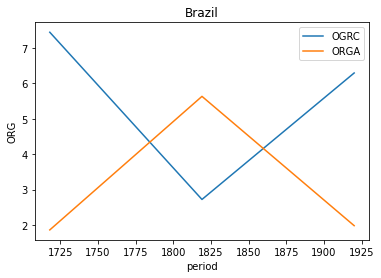

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


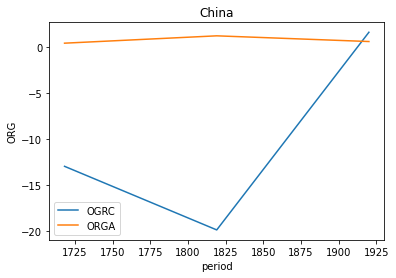

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


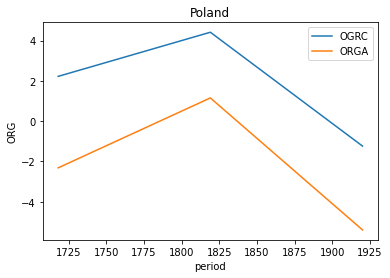

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


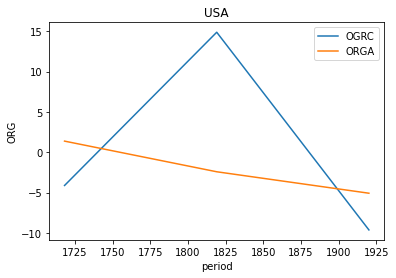

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


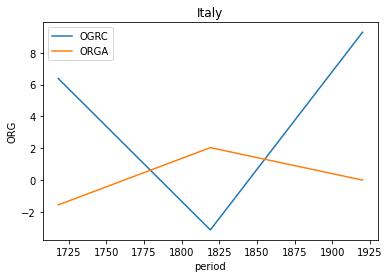

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


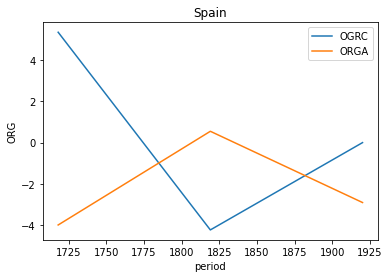

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


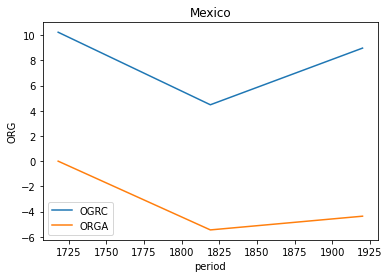

In [38]:
for i in Xgen['Country'].unique():
    c= gr.get_group(i)
    a= sns.lineplot(c['Period'],c['OGRC'])
    sns.lineplot(c['Period'],c['ORGA'])
    a.set(xlabel= 'period',ylabel= 'ORG', title=i)
    a.legend(['OGRC', 'ORGA'])
    plt.show()

### Correlation between ORGC and ORGA

In [39]:
coco= Xgen['OGRC'].corr(Xgen['ORGA'])

In [40]:
(coco*np.sqrt(28))/np.sqrt(1-coco**2) 

-0.22114772461004173

t_value < t_alpha(alpha 5%) => fail to reject H_0. There is no relationship between ongoing growth rate of CP and  ongoing growth rate of  AP

## SOMETHING ELSE WE EXPERIMENTED

### Fixed effect model with OGR
This model uses ongoing growth rate of CP (OGRC) as explanatory variable and ongoing growth rate of AP (ORGA)  as dependent variable. Countries are transformed to dummies acting as control variables

In [41]:
y= Xgen['ORGA']

In [42]:
country=pd.get_dummies(Xgen['Country'],drop_first=True)

In [43]:
Xfull = pd.concat((Xgen,country),axis=1).drop(['Country','Period'],axis=1)

In [44]:
Xuse = Xfull.drop(['ORGA'], axis=1)

In [45]:
X= sm.add_constant(Xuse)

In [46]:
est= sm.OLS(y,X)

In [47]:
est2= est.fit()

In [48]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   ORGA   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     2.081
Date:                Mon, 14 Jun 2021   Prob (F-statistic):             0.0813
Time:                        16:13:24   Log-Likelihood:                -63.353
No. Observations:                  30   AIC:                             148.7
Df Residuals:                      19   BIC:                             164.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0799      1.515      2.032      0.0

=> P_value of OGRC is 0.863 -> failed to reject H_0